# Sioma 2018 labels for OpenMapFlow

In [1]:
import numpy as np
import pandas as pd
import json
import random
import geopandas as gpd

## Points

In [2]:
points = gpd.read_file('../data/farm_plots/Silowana_Conservation_Agricultu.shp')
points.shape

(2300, 46)

In [3]:
sorted(points['Year'].unique())

[2017, 2018, 2019, 2020]

In [4]:
points['geometry'].nunique()

2181

In [5]:
points_deduplicated = points[['Year', 'geometry']].copy()
points_deduplicated = points_deduplicated.rename(columns={'Year': 'year'})
points_deduplicated['type'] = 'point'
points_deduplicated = points_deduplicated.drop_duplicates().reset_index(drop=True)
points_deduplicated.head()

,year,geometry,type
0,2019,POINT (2657700.523 -1911870.608),point
1,2019,POINT (2657729.466 -1912132.221),point
2,2019,POINT (2657680.299 -1912156.463),point
3,2019,POINT (2657650.800 -1912077.726),point
4,2019,POINT (2657650.985 -1912078.696),point


In [6]:
points_deduplicated.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   year      2181 non-null   int64   
 1   geometry  2181 non-null   geometry
 2   type      2181 non-null   object  
dtypes: geometry(1), int64(1), object(1)
memory usage: 51.2+ KB


In [7]:
points_deduplicated.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
points_deduplicated = points_deduplicated.to_crs(epsg=4326)

In [9]:
points_deduplicated.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
points_deduplicated['lon'] = points_deduplicated['geometry'].x
points_deduplicated['lat'] = points_deduplicated['geometry'].y

In [11]:
points_deduplicated_filtered = points_deduplicated[(points_deduplicated['year'] == 2018)
                                                   & (points_deduplicated['lon'] >= 23.49305)
                                                   & (points_deduplicated['lon'] <= 23.65081)
                                                   & (points_deduplicated['lat'] >= -16.68922)
                                                   & (points_deduplicated['lat'] <= -16.63988)].reset_index(drop=True)

<AxesSubplot:>

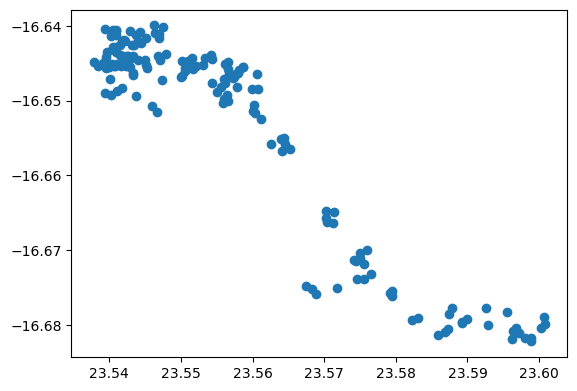

In [12]:
points_deduplicated_filtered.plot()

In [13]:
points_deduplicated_filtered = points_deduplicated_filtered.drop(['year', 'geometry', 'type'], axis=1)
points_deduplicated_filtered['crop'] = 1
points_deduplicated_filtered = points_deduplicated_filtered[['crop', 'lat', 'lon']]
points_deduplicated_filtered

,crop,lat,lon
0,1,-16.641193,23.540918
1,1,-16.645839,23.556626
2,1,-16.644012,23.542565
3,1,-16.649293,23.556424
4,1,-16.647048,23.557328
...,...,...,...
159,1,-16.647059,23.556034
160,1,-16.646396,23.557680
161,1,-16.641292,23.543686
162,1,-16.648283,23.541718


## Vegetation

In [14]:
vegetation = pd.read_csv('data/vegetation.csv')
vegetation.head()

,system:index,landcover,.geo
0,0,0,"{""type"":""Point"",""coordinates"":[23.531761174316..."
1,1,0,"{""type"":""Point"",""coordinates"":[23.533134465332..."
2,2,0,"{""type"":""Point"",""coordinates"":[23.527469639892..."
3,3,0,"{""type"":""Point"",""coordinates"":[23.504467015380..."
4,4,0,"{""type"":""Point"",""coordinates"":[23.503608708496..."


In [15]:
vegetation['lon'] = np.nan
vegetation['lat'] = np.nan
for index,row in vegetation.iterrows():
    vegetation.loc[vegetation.index == index, 'lon'] = json.loads(row['.geo'])['coordinates'][0]
    vegetation.loc[vegetation.index == index, 'lat'] = json.loads(row['.geo'])['coordinates'][1]
vegetation.head()

,system:index,landcover,.geo,lon,lat
0,0,0,"{""type"":""Point"",""coordinates"":[23.531761174316...",23.531761,-16.661195
1,1,0,"{""type"":""Point"",""coordinates"":[23.533134465332...",23.533134,-16.665882
2,2,0,"{""type"":""Point"",""coordinates"":[23.527469639892...",23.527470,-16.669336
3,3,0,"{""type"":""Point"",""coordinates"":[23.504467015380...",23.504467,-16.668842
4,4,0,"{""type"":""Point"",""coordinates"":[23.503608708496...",23.503609,-16.657906


In [16]:
vegetation = vegetation.drop(['system:index', 'landcover', '.geo'], axis=1)
vegetation['crop'] = 0
vegetation = vegetation[['crop', 'lat', 'lon']]
vegetation.head()

,crop,lat,lon
0,0,-16.661195,23.531761
1,0,-16.665882,23.533134
2,0,-16.669336,23.527470
3,0,-16.668842,23.504467
4,0,-16.657906,23.503609


## Water

In [17]:
water = pd.read_csv('data/water.csv')
water.head()

,system:index,landcover,.geo
0,0,1,"{""type"":""Point"",""coordinates"":[23.562488560791..."
1,1,1,"{""type"":""Point"",""coordinates"":[23.564205174560..."
2,2,1,"{""type"":""Point"",""coordinates"":[23.568067555542..."
3,3,1,"{""type"":""Point"",""coordinates"":[23.581628804321..."
4,4,1,"{""type"":""Point"",""coordinates"":[23.584375386352..."


In [18]:
water['lon'] = np.nan
water['lat'] = np.nan
for index,row in water.iterrows():
    water.loc[water.index == index, 'lon'] = json.loads(row['.geo'])['coordinates'][0]
    water.loc[water.index == index, 'lat'] = json.loads(row['.geo'])['coordinates'][1]
water.head()

,system:index,landcover,.geo,lon,lat
0,0,1,"{""type"":""Point"",""coordinates"":[23.562488560791...",23.562489,-16.642447
1,1,1,"{""type"":""Point"",""coordinates"":[23.564205174560...",23.564205,-16.644502
2,2,1,"{""type"":""Point"",""coordinates"":[23.568067555542...",23.568068,-16.643516
3,3,1,"{""type"":""Point"",""coordinates"":[23.581628804321...",23.581629,-16.643269
4,4,1,"{""type"":""Point"",""coordinates"":[23.584375386352...",23.584375,-16.645078


In [19]:
water = water.drop(['system:index', 'landcover', '.geo'], axis=1)
water['crop'] = 0
water = water[['crop', 'lat', 'lon']]
water.head()

,crop,lat,lon
0,0,-16.642447,23.562489
1,0,-16.644502,23.564205
2,0,-16.643516,23.568068
3,0,-16.643269,23.581629
4,0,-16.645078,23.584375


## Merge and save data

In [20]:
merged = pd.concat([points_deduplicated_filtered, vegetation, water], axis=0).reset_index(drop=True)
merged

,crop,lat,lon
0,1,-16.641193,23.540918
1,1,-16.645839,23.556626
2,1,-16.644012,23.542565
3,1,-16.649293,23.556424
4,1,-16.647048,23.557328
...,...,...,...
219,0,-16.655110,23.582830
220,0,-16.646558,23.585491
221,0,-16.644502,23.565235
222,0,-16.645243,23.568325


In [21]:
subsets = ['training'] * int(round(224 * 0.7, 0)) + ['validation'] * int(round(224 * 0.2, 0)) + ['testing'] * int(round(224 * 0.1, 0))
random.seed(42)
random.shuffle(subsets)

In [22]:
merged['subset'] = subsets
merged

,crop,lat,lon,subset
0,1,-16.641193,23.540918,training
1,1,-16.645839,23.556626,training
2,1,-16.644012,23.542565,validation
3,1,-16.649293,23.556424,training
4,1,-16.647048,23.557328,training
...,...,...,...,...
219,0,-16.655110,23.582830,training
220,0,-16.646558,23.585491,validation
221,0,-16.644502,23.565235,training
222,0,-16.645243,23.568325,training


In [23]:
merged_shuffled = merged.sample(frac=1, random_state=42).reset_index(drop=True)
merged_shuffled

,crop,lat,lon,subset
0,1,-16.680979,23.586934,training
1,1,-16.679968,23.592860,training
2,1,-16.641067,23.546991,training
3,1,-16.681839,23.596187,training
4,0,-16.644502,23.565235,training
...,...,...,...,...
219,1,-16.644376,23.553363,validation
220,1,-16.648428,23.560825,training
221,1,-16.647697,23.556174,validation
222,0,-16.665307,23.647032,testing


In [24]:
merged_shuffled.to_csv('data/sioma_2018.csv', index=False)